In [8]:
import nflgame
import pandas as pd
import numpy as np

# Defensive Stats Dataframe

In [9]:
teams_map = {}
teams = []
for team in nflgame.teams:
    teams.append(team[0])
    for i in range(len(team)):
        teams_map[team[i]] = team[0]
teams.remove('STL')

In [10]:
# Build DataFrame - Index for Player name and week #
wks = range(1,18)
idxs = [teams, wks]

idx = pd.MultiIndex.from_product(idxs, names=['name', 'week'])
columns = [
    'rushing_att', 
    'rushing_yds', 
    'rushing_tds', 
    'fumbles_tot',
    'home',
    'DNP',
    'fantasy_points'
]
df = pd.DataFrame(data=None, index=idx, columns=columns)

In [11]:
df.head(5)

rushing_att rushing_yds rushing_tds fumbles_tot home  DNP  \
name week                                                             
ARI  1            NaN         NaN         NaN         NaN  NaN  NaN   
     2            NaN         NaN         NaN         NaN  NaN  NaN   
     3            NaN         NaN         NaN         NaN  NaN  NaN   
     4            NaN         NaN         NaN         NaN  NaN  NaN   
     5            NaN         NaN         NaN         NaN  NaN  NaN   

          fantasy_points  
name week                 
ARI  1               NaN  
     2               NaN  
     3               NaN  
     4               NaN  
     5               NaN

# Get Data

In [12]:
# NFL Games for 2016
games = nflgame.games(2016)

In [13]:
for g in games:
    wk = g.schedule['week']
    rushing_att_h = 0
    rushing_yds_h = 0
    fumbles_tot_h = 0
    rushing_tds_h = 0
    
    rushing_att_a = 0
    rushing_yds_a = 0
    fumbles_tot_a = 0
    rushing_tds_a = 0
    for p in g.players.rushing():
        if p.home:
            rushing_att_h += p.rushing_att
            rushing_yds_h += p.rushing_yds
            fumbles_tot_h += p.fumbles_tot
            rushing_tds_h += p.rushing_tds
        else:
            rushing_att_a += p.rushing_att
            rushing_yds_a += p.rushing_yds
            fumbles_tot_a += p.fumbles_tot
            rushing_tds_a += p.rushing_tds
    
    # Home Defense accumulates Away Offense
    home = teams_map[g.home]
    df.loc[(g.home, wk), 'home'] = 1
    df.loc[(home, wk), 'rushing_att'] = rushing_att_a
    df.loc[(home, wk), 'rushing_yds'] = rushing_yds_a
    df.loc[(home, wk), 'fumbles_tot'] = fumbles_tot_a
    df.loc[(home, wk), 'rushing_tds'] = rushing_tds_a
    
    # Away Defense accumulates Home Offense
    away = teams_map[g.away]
    df.loc[(g.away, wk), 'home'] = 0
    df.loc[(away, wk), 'rushing_att'] = rushing_att_h
    df.loc[(away, wk), 'rushing_yds'] = rushing_yds_h
    df.loc[(away, wk), 'fumbles_tot'] = fumbles_tot_h
    df.loc[(away, wk), 'rushing_tds'] = rushing_tds_h

In [14]:
# Calculate Fantasy Points
df['fantasy_points'] = df['rushing_yds'] * .1 + df['rushing_tds'] * 6 - df['fumbles_tot'] * 2

In [15]:
# DNP
df.loc[df['fantasy_points'].isnull(), 'DNP'] = True
df.loc[df['fantasy_points'].notnull(), 'DNP'] = False

# Fill NaNs
df = df.fillna(0)

# Boolean Values to int
df['DNP'] = df['DNP'].astype('int')

In [16]:
df.head(17)

rushing_att  rushing_yds  rushing_tds  fumbles_tot  home  DNP  \
name week                                                                  
ARI  1              31          106            1            3     1    0   
     2              21           85            0            1     1    0   
     3              32          208            3            3     0    0   
     4              23           41            0            1     1    0   
     5              36          151            2            0     0    0   
     6              14           33            0            1     1    0   
     7              19           52            0            2     1    0   
     8              36          141            2            1     0    0   
     9               0            0            0            0     0    1   
     10             28           83            1            0     1    0   
     11             24           72            1            1     0    0   
     12             30          116            3            0     0    0   
     13             18           87            1            1     1    0   
     14             31           83            0            4     0    0   
     15             32          130            2            1     1    0   
     16             27           78            0            1     0    0   
     17             22           52            0            3     0    0   

           fantasy_points  
name week                  
ARI  1               10.6  
     2                6.5  
     3               32.8  
     4                2.1  
     5               27.1  
     6                1.3  
     7                1.2  
     8               24.1  
     9                0.0  
     10              14.3  
     11              11.2  
     12              29.6  
     13              12.7  
     14               0.3  
     15              23.0  
     16               5.8  
     17              -0.8

In [76]:
df[df['DNP'] == 0].rolling(window=4, min_periods=1).mean().astype(int)

rushing_att  rushing_yds  rushing_tds  fumbles_tot  home  DNP  \
name week                                                                  
ARI  1              31          106            1            3     1    0   
     2              26           95            0            2     1    0   
     3              28          133            1            2     0    0   
     4              26          110            1            2     0    0   
     5              28          121            1            1     0    0   
     6              26          108            1            1     0    0   
     7              23           69            0            1     0    0   
     8              26           94            1            1     0    0   
     10             24           77            0            1     0    0   
     11             26           87            1            1     0    0   
     12             29          103            1            0     0    0   
     13             25           89            1            0     0    0   
     14             25           89            1            1     0    0   
     15             27          104            1            1     0    0   
     16             27           94            0            1     0    0   
     17             28           85            0            2     0    0   
ATL  1              27           87            0            1     0    0   
     2              25           93            0            1     0    0   
     3              24          103            0            0     0    0   
     4              22          102            0            0     0    0   
     5              21          100            0            0     0    0   
     6              22           80            1            1     0    0   
     7              23           70            1            1     0    0   
     8              24           85            1            1     0    0   
     9              22           82            1            1     0    0   
     10             25          116            1            1     0    0   
     12             22          111            0            1     0    0   
     13             23          115            1            1     0    0   
     14             24          123            1            1     0    0   
     15             19           98            1            1     0    0   
...                ...          ...          ...          ...   ...  ...   
TEN  3              27          113            0            0     0    0   
     4              25          110            0            0     0    0   
     5              22          106            0            0     0    0   
     6              20           82            0            0     0    0   
     7              20           71            0            0     0    0   
     8              16           55            0            0     0    0   
     9              22           94            0            0     0    0   
     10             21          101            0            0     0    0   
     11             22          100            0            0     0    0   
     12             25          112            0            0     0    0   
     14             18           64            0            0     0    0   
     15             21           86            0            1     0    0   
     16             21           88            0            1     0    0   
     17             21           76            1            1     0    0   
WAS  1              27          108            1            1     0    0   
     2              27           94            1            1     0    0   
     3              25          103            2            1     0    0   
     4              27          133            2            2     0    0   
     5              24          125            1            1     0    0   
     6              22          123            0           

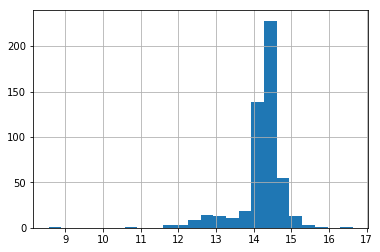

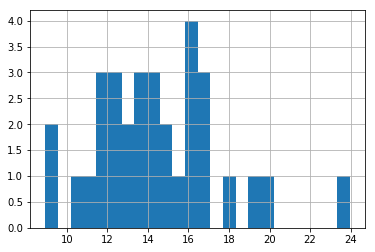

In [18]:
import matplotlib.pyplot as plt
df[df['DNP'] == 0]['fantasy_points'].expanding().mean().hist(bins=24)
plt.show()
df[df['DNP'] == 0]['fantasy_points'].groupby('name').mean().hist(bins=24)
plt.show()

In [19]:
df_mean = df[df['DNP'] == 0].expanding().mean().astype(int)
df_mean.head(17)

rushing_att  rushing_yds  rushing_tds  fumbles_tot  home  DNP  \
name week                                                                  
ARI  1              31          106            1            3     1    0   
     2              26           95            0            2     1    0   
     3              28          133            1            2     0    0   
     4              26          110            1            2     0    0   
     5              28          118            1            1     0    0   
     6              26          104            1            1     0    0   
     7              25           96            0            1     0    0   
     8              26          102            1            1     0    0   
     10             26          100            1            1     0    0   
     11             26           97            1            1     0    0   
     12             26           98            1            1     0    0   
     13             26           97            1            1     0    0   
     14             26           96            1            1     0    0   
     15             26           99            1            1     0    0   
     16             26           97            1            1     0    0   
     17             26           94            1            1     0    0   
ATL  1              26           94            0            1     0    0   

           fantasy_points  
name week                  
ARI  1                 10  
     2                  8  
     3                 16  
     4                 13  
     5                 15  
     6                 13  
     7                 11  
     8                 13  
     10                13  
     11                13  
     12                14  
     13                14  
     14                13  
     15                14  
     16                13  
     17                12  
ATL  1                 12

In [48]:
def_row = df_mean.loc['NYJ', 1]

In [49]:
def_row

rushing_att        25
rushing_yds       108
rushing_tds         0
fumbles_tot         0
home                0
DNP                 0
fantasy_points     14
Name: (NYJ, 1), dtype: int64

In [46]:
def_row['home'] = df.loc['NYJ', 1]['home']

In [47]:
def_row

rushing_att        26
rushing_yds       102
rushing_tds         1
fumbles_tot         1
home                1
DNP                 0
fantasy_points     13
Name: (ARI, 8), dtype: int64

In [65]:
(teams_map['JAX'], 3) not in list(df_mean.index.values)

False

In [56]:
teams_map['JAX']

'JAC'

In [71]:
df_mean.loc['JAC', 2]

rushing_att        25
rushing_yds       109
rushing_tds         0
fumbles_tot         0
home                0
DNP                 0
fantasy_points     14
Name: (JAC, 2), dtype: int64